# Iris Species
---
## Data
The dataset contains data for the Iris species namely Iris-setosa, Iris-versicolor and Iris-virginica. Data for each specie is sepal width, sepal length, petal width and petal length and all are measured in cm. The objective is cluster the data into the different kind of species.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq, whiten

In [2]:
iris = pd.read_csv('data/Iris.csv')
print(iris.shape)
print(iris.columns.tolist())

(150, 6)
['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


The dataset contains 150 records, 50 for each specie and 6 fields.

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


---

## Variables
1. Id (numeric):
    * Entry index.
2. SepalLengthCm (numeric):
    * Measured in cm the length of the sepal of the iris flower.
3. SepalWidthCm (numeric):
    * Measured in cm the width of the sepal of the iris flower.
4. PetalLengthCm (numeric):
    * Measured in cm the length of the petal of the iris flower.
5. PetalWidthCm (numeric):
    * Measured in cm the width of the petal of the iris flower.
6. Species (categorical):
    * Type of iris specie.
---

## Basic description
Getting the basic description of the dataset of the numeric columns.

In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


---

## Cleaning data

In [5]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Dataset contains no missing data.
___

## Data exploration

In [6]:
iris.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

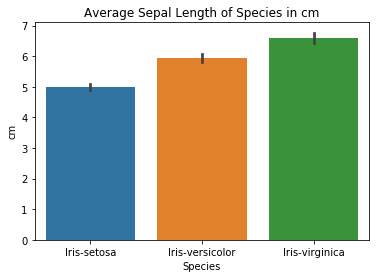

In [7]:
sns.barplot(x='Species', y='SepalLengthCm', data=iris)
plt.title('Average Sepal Length of Species in cm')
plt.ylabel('cm')
plt.show()

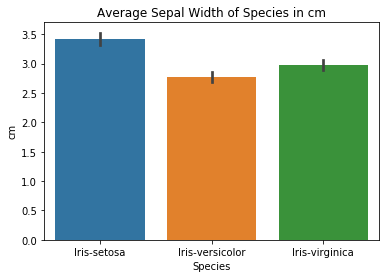

In [8]:
sns.barplot(x='Species', y='SepalWidthCm', data=iris)
plt.title('Average Sepal Width of Species in cm')
plt.ylabel('cm')
plt.show()

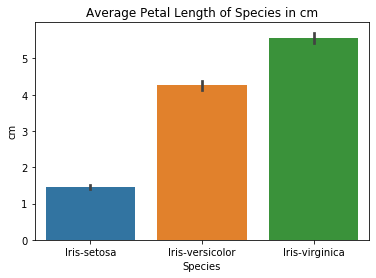

In [9]:
sns.barplot(x='Species', y='PetalLengthCm', data=iris)
plt.title('Average Petal Length of Species in cm')
plt.ylabel('cm')
plt.show()

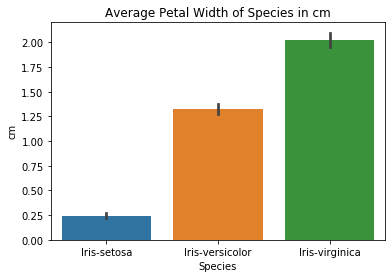

In [10]:
sns.barplot(x='Species', y='PetalWidthCm', data=iris)
plt.title('Average Petal Width of Species in cm')
plt.ylabel('cm')
plt.show()

---

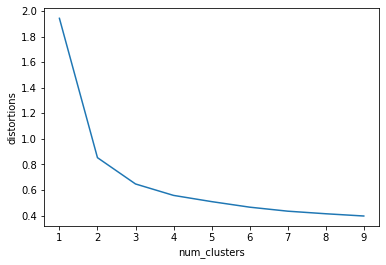

In [11]:
distortions = []
num_clusters = range(1, 10)

for i in num_clusters:
    cluster_centers, distortion = kmeans(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']], i)
    distortions.append(distortion)
    
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [12]:
cluster_centers, distortion = kmeans(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']], 2)

iris['cluster_labels'], distortion_list = vq(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']], cluster_centers)

In [13]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster_labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [14]:
iris.groupby('cluster_labels')[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']].mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
cluster_labels,,,,
0,6.301031,2.886598,4.958763,1.695876
1,5.005660,3.360377,1.562264,0.288679


In [15]:
iris.groupby('cluster_labels')['Id'].count()

cluster_labels
0    97
1    53
Name: Id, dtype: int64

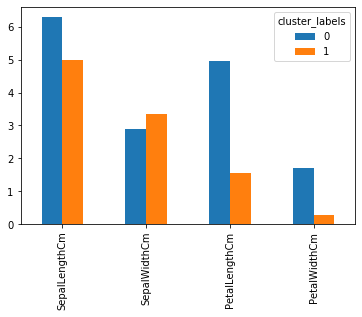

In [16]:
iris.groupby('cluster_labels')[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']].mean().transpose().plot(kind='bar')
plt.show()

In [17]:
iris_group = iris.groupby('cluster_labels')[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']].mean().transpose()
iris_group

cluster_labels,0,1
SepalLengthCm,6.301031,5.005660
SepalWidthCm,2.886598,3.360377
PetalLengthCm,4.958763,1.562264
PetalWidthCm,1.695876,0.288679


In [18]:
iris[iris.cluster_labels==0].Species.unique()

array(['Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
iris[iris.cluster_labels==1].Species.unique()

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [20]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

---

In [21]:
from sklearn.decomposition import PCA

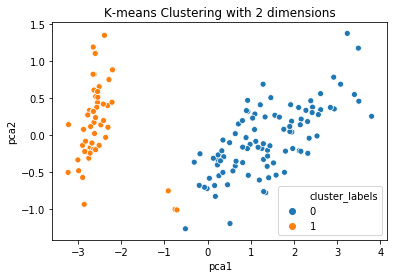

In [22]:
reduced_data = PCA(n_components=2).fit_transform(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=iris['cluster_labels'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

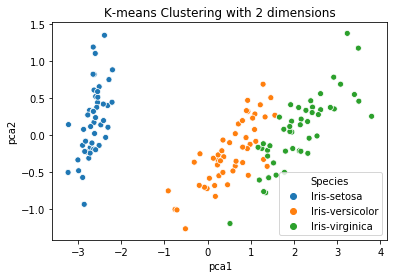

In [23]:
reduced_data = PCA(n_components=2).fit_transform(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']])
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=iris['Species'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()